# 1- Dataset Wrangling and Exploration:

### Import Libraries and Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('heart.csv')

### Display dataset 

In [5]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Variables description:

- sex: 1=male ; 0=female

- cp: chest pain type (4 values)
0= typical angina
1= atypical angina
2= non-anginal pain
3= asymptomatic

- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestrol in mg/dl
- fbs: fasting blood suger more than 120mg/dl (0= false; 1= true)

- restecg: resting electrochardiograpgic results
0= normal
1= having ST-T wave abnormality (Twave inversion and/or ST elevation or depression of>0.05mV)
2= showing ptobable or definite left ventrical hypertrophy by Estes' criteria

- thalach1: maximum heart rate achieved 
- exang: excerise included angina (1=yes; 0=no)

- oldpeak: ST depression induced by excersie relative to rest
- slope: the slope of the peak excerise ST segment
Value 1= upsloping
Value 2= flat
Value 3 = downsloping

- ca: number of major vessels (0-3) colored by floroscopy
- thal: 3= normal; 6=fixed defect; 7=reversable defect
- target: 0=less chance of heart attack; 1=more chance of heart

In [6]:
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
print('number of rows',data.shape[0])
print('number of columns',data.shape[1])

number of rows 1025
number of columns 14


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Check for null values or duplicates in the dataset

In [9]:
print("Is there any missing value?", data.isnull().values.any())

Is there any missing value? False


In [10]:
dup_data = data.duplicated().any()

In [11]:
print("Are there any duplicated value?", dup_data)

Are there any duplicated value? True


In [12]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [14]:
print('number of rows',data.shape[0])

number of rows 302


### Get overall statistics about the dataset

In [15]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Draw Correlation Matrix

In [16]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

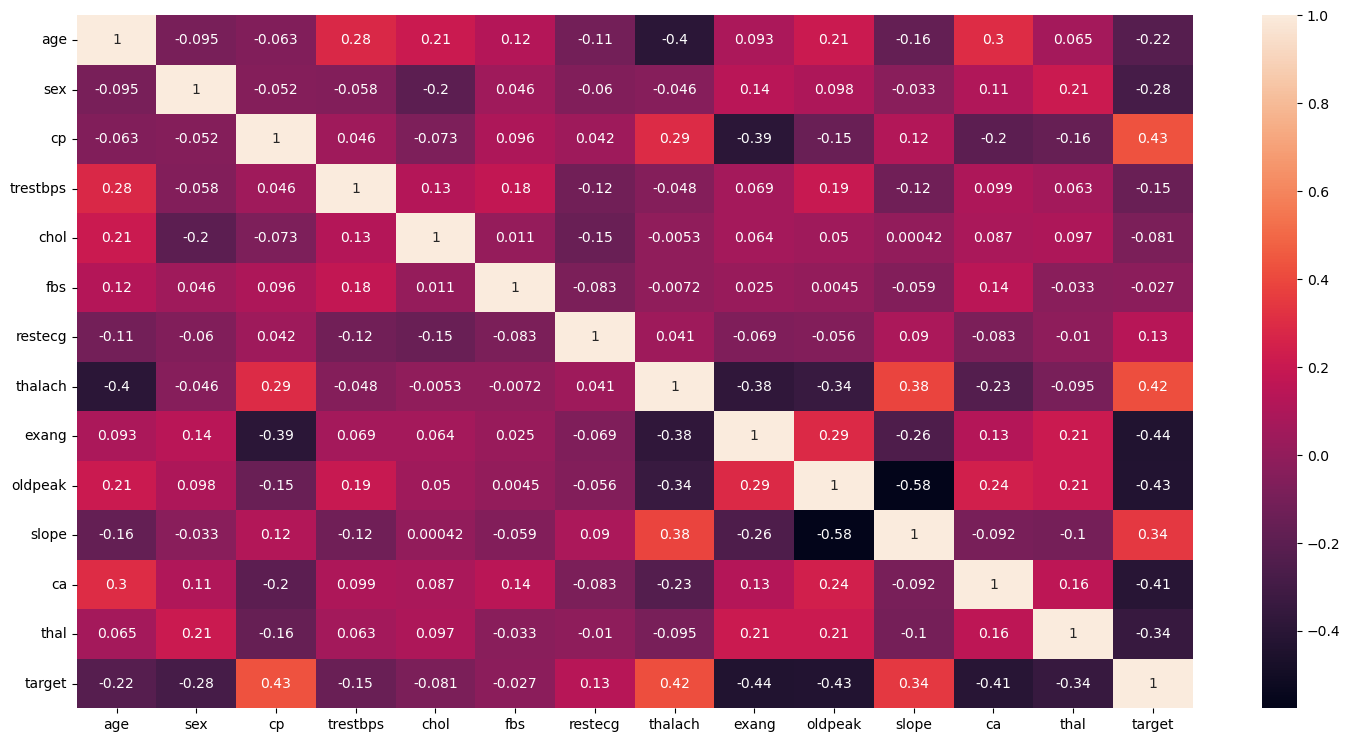

In [17]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),annot=True)

## Data exploration

### How many people have heart disease, and how many don't have heart disease in this dataset?

In [19]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x1c0eabe3210>,
 [Text(0, 0, 'Less chance of Heart Disease'),
  Text(1, 0, 'More chance of Heart Disease')])

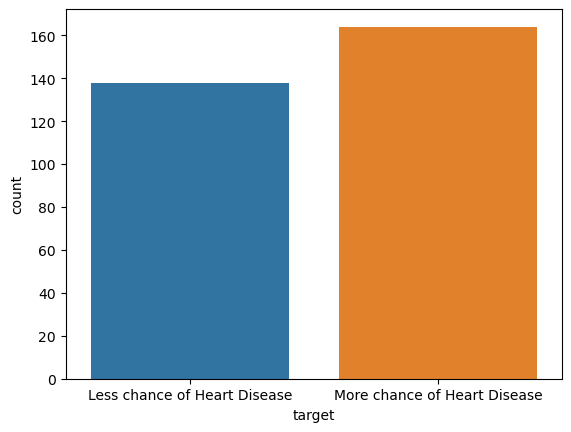

In [21]:
sns.countplot(data=data, x='target')
plt.xticks([0,1],['Less chance of Heart Disease','More chance of Heart Disease'])

### Find count of  Male & Female in this dataset

In [22]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

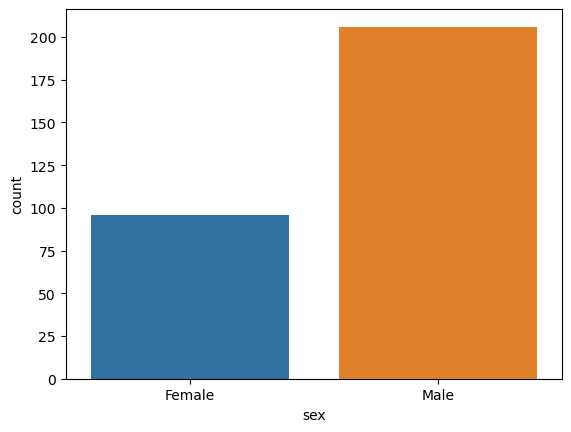

In [23]:
sns.countplot(data=data, x='sex')
plt.xticks([0,1],['Female','Male'])
plt.show()

### Find Gender distribution according to the Target variable

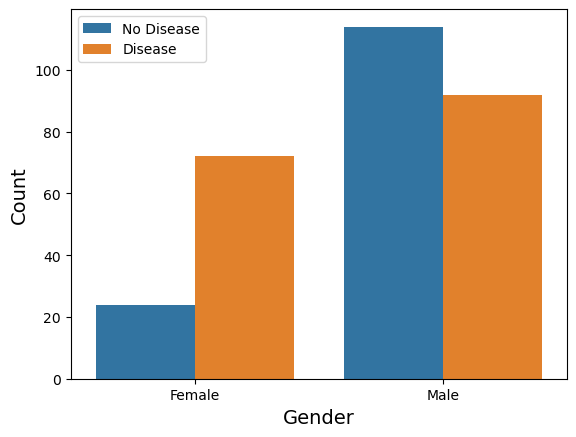

In [24]:
sns.countplot(data=data, x='sex', hue='target')
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No Disease','Disease'])
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

### Check Age distribution

C:\Users\u0149935\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


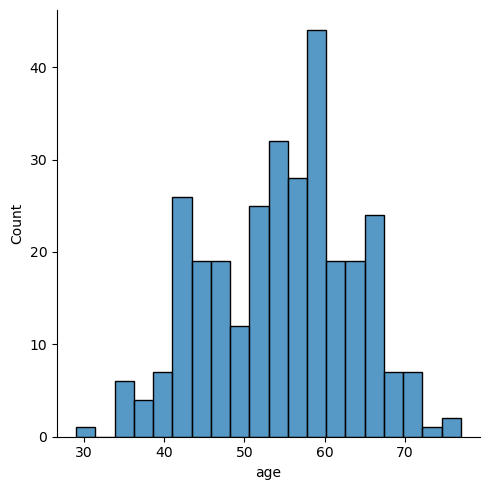

In [25]:
sns.displot(data['age'],bins=20)
plt.show()

### Check Chest Pain types
- cp: chest pain type (4 values)
0= typical angina
1= atypical angina
2= non-anginal pain
30 asymptomatic

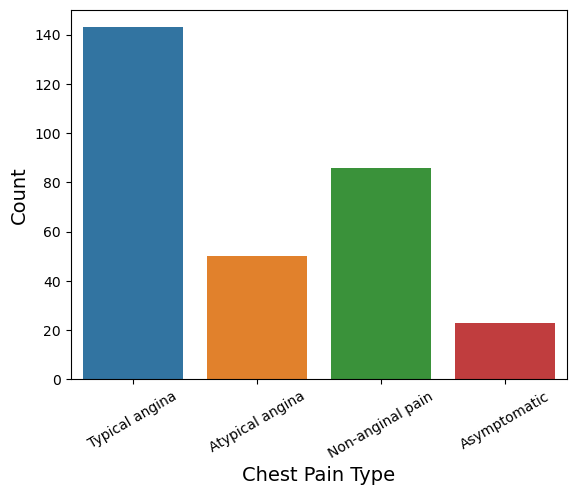

In [26]:
sns.countplot(data=data, x='cp')
plt.xticks([0,1,2,3],['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic'],rotation=30)
plt.xlabel("Chest Pain Type",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

### Show the Chest Pain distribution as per Target variable

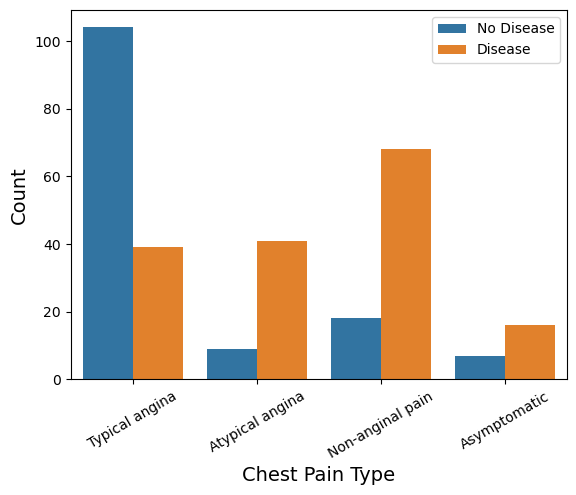

In [27]:
sns.countplot(data=data, x='cp', hue='target')
plt.xticks([0,1,2,3],['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic'],rotation=30)
plt.xlabel("Chest Pain Type",fontsize=14)
plt.legend(labels=['No Disease','Disease'])
plt.ylabel("Count",fontsize=14)
plt.show()

### Show Fasting Blood Sugar distribution according to Target variable

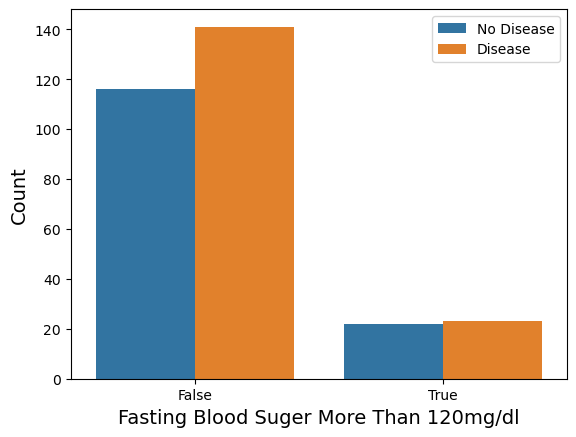

In [29]:
sns.countplot(data=data, x='fbs', hue='target')
plt.xticks([0,1],['False','True'])
plt.xlabel("Fasting Blood Suger More Than 120mg/dl",fontsize=14)
plt.legend(labels=['No Disease','Disease'])
plt.ylabel("Count",fontsize=14)
plt.show()

### Check Resting Blood Pressure distribution

<Axes: >

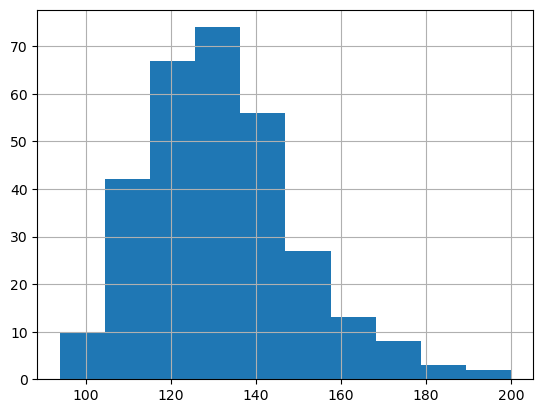

In [25]:
data['trestbps'].hist()

### Compare Resting Blood Pressure as per Gender

C:\Users\u0149935\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444459, 'Resting Blood Pressure')

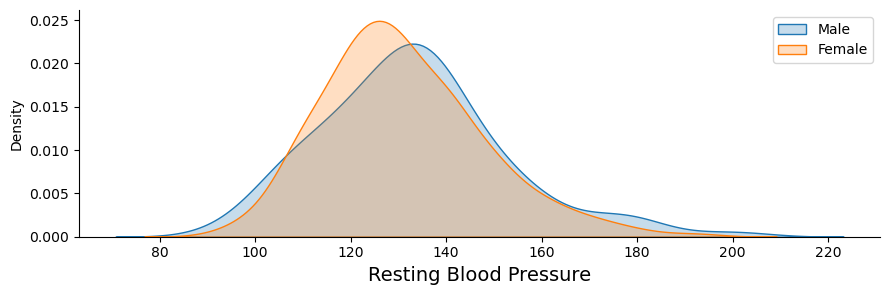

In [32]:
g = sns.FacetGrid(data,hue='sex',aspect=3)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])
plt.xlabel("Resting Blood Pressure",fontsize=14)

### Show distribution of Serum Cholesterol

<Axes: >

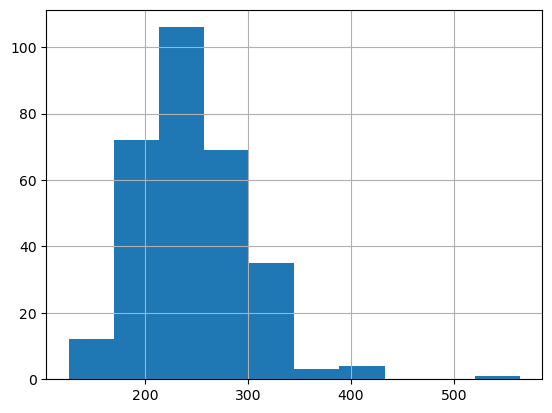

In [33]:
data['chol'].hist()

### Plot Continuous Variables

In [28]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Split columns which have Continuous values and columns with categorical values

(Spliting Categorical columns from Continuous columns is an important part of data processing)

In [34]:
cat_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique(0) <=10:
        cat_val.append(column)
    else:
        cont_val.append(column)

In [35]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [36]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

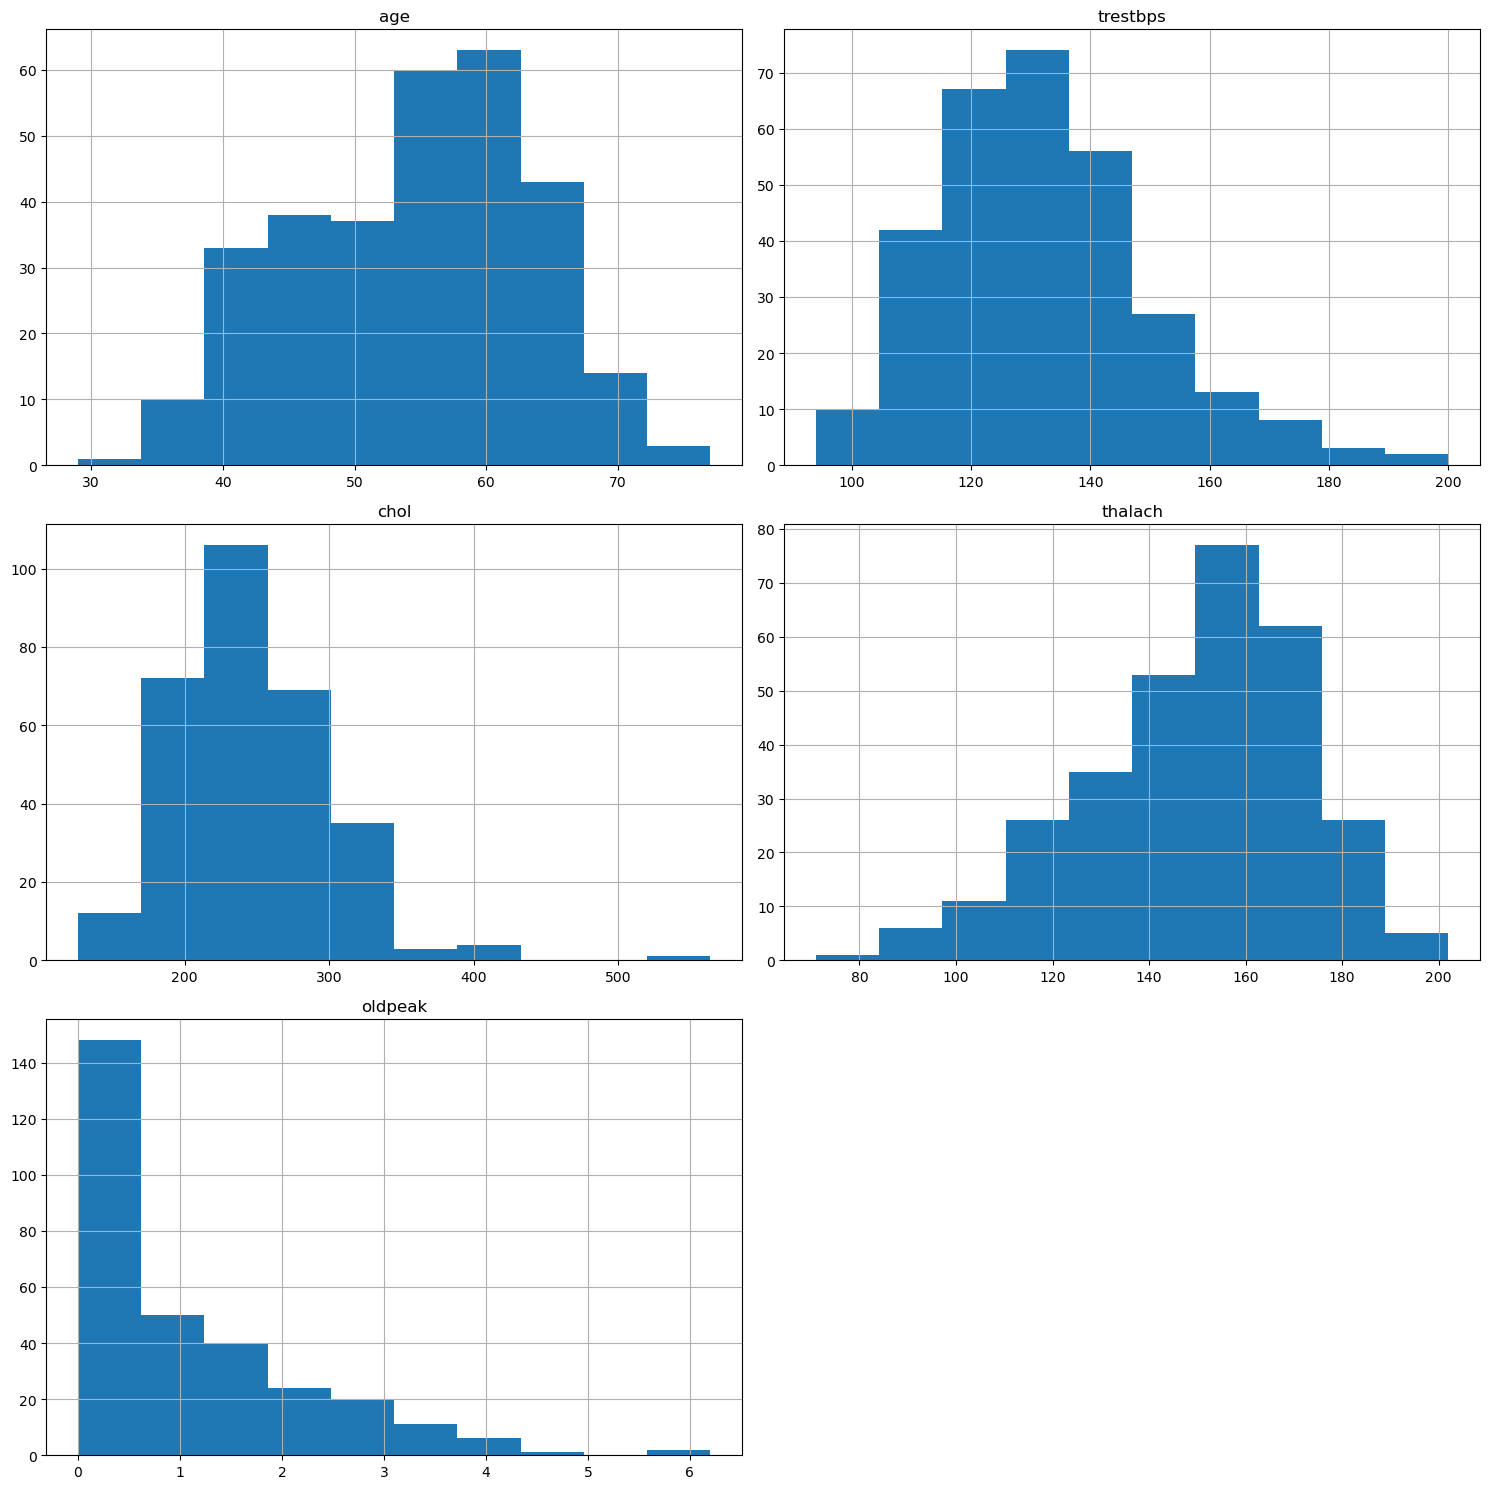

In [32]:
data.hist(cont_val, figsize=(15,15))
plt.tight_layout()
plt.show()

We can notice here the oldpeak is left skewed and the thalach is right skewed

# 2- Prediction of Heart Disease incident using Machine Learning:

### Econding of Categorical data

Here the numbers are encoding a pain type, but ML model does not understand that

So we need to convert each value into one column with binary values; four columns in this case

Also called as "Dummy Variables"

The Dummy Trap: a senario in which the independent variable are highly correlated, means; one variable can be predicted from other variables

In [37]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [38]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

Remove 'sex' and 'target' columns from the list bc they already contain binary values in their column

In [39]:
cat_val.remove('sex')
cat_val.remove('target')

In [40]:
data=pd.get_dummies(data,columns=cat_val, dtype=int,drop_first=True)

In [41]:
data.head(2)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


### Feature Scaling

FS allows us to put our continous variables (features) into the same scale

It's essintial for ML algorithm that calculate distance between data

If not scaled, the features with highest valeus start dominating distances

Any ML algorith which is not distance-based, is not affected by FS

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [44]:
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Splitting the dataset into the Training set and Test set

First split independent variables from dependent variable

In [45]:
X = data.drop('target',axis=1)

In [46]:
y = data['target']

Then perform train test split

In [51]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [53]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [54]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [56]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64



Our 'target' column has values 0 and 1, a categorical variable; so this is a classification problem

Steps:
- Use different classification algorithms
- Evaluate their performace based on accurecy
- Find the best model for this particular dataset

In [57]:
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

Create instacne for this logistic regression:

In [60]:
log = LogisticRegression()

Train the model on our training set:

In [61]:
log.fit(X_train,y_train)

LogisticRegression()

Our model is trained, now we will perform predication:

In [62]:
y_pred1 = log.predict(X_test)

Let's check how accurate this model is:

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

Our Logistic Regression model is around 79% accurate for this particular dataset

### SVC 

Support Vector Classifier

In [65]:
from sklearn import svm

Create instacne for this model

In [66]:
svm = svm.SVC()

Train the model on our training set

In [67]:
svm.fit(X_train,y_train)

SVC()

Perform prediction using samples that we have saved in X_test

In [69]:
y_pred2 = svm.predict(X_test)

Check the SVC model for accuracy

In [70]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

Our Support Vector Classifier model is around 80% accurate for this particular dataset

### Non-Linear ML Algorithms

For non-linear ML algorithm, it's not required to perform any intiger scaling

- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Prediction on New Data
- Save Model Usign Joblib
- Creating GUI

Let's upload the data once again:

In [80]:
data = pd.read_csv('heart.csv')

In [81]:
data = data.drop_duplicates()

In [82]:
X = data.drop('target',axis=1)
y = data['target']

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Decision Tree Classifier


In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt = DecisionTreeClassifier()

In [86]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
y_pred4 = dt.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred4)

0.7377049180327869

Our Decision Tree Classifier is 72% accurate

## Random Forest Classifier 

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf = RandomForestClassifier()

In [91]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
y_pred5 = rf.predict(X_test)

In [93]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

Our Random forest classifier is 80% accurate

## Gradient Boosting Classifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gbc = GradientBoostingClassifier()

In [96]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [97]:
y_pred6 = rf.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

Our Gradient Boosting Classifier is 80% accurate

### Compare different accuracy scores provided by different models:

In [103]:
final_data = pd.DataFrame({'Models':['LR','SVC','DTC','RFC','GBC'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)]})

In [104]:
final_data

,Models,ACC
0,LR,0.786885
1,SVC,0.803279
2,DTC,0.737705
3,RFC,0.852459
4,GBC,0.852459


<Axes: xlabel='Models', ylabel='ACC'>

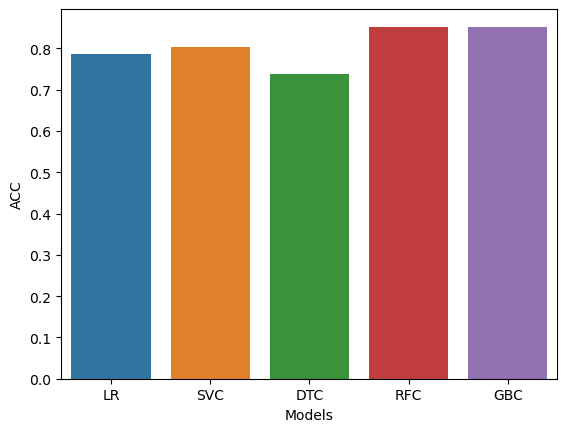

In [105]:
sns.barplot(data=final_data,x='Models',y='ACC')

We can choose the best model for our production, Random Forest Classifier and Gradient Boosting Classifier had equally the highest sccuracy score

Remember that we did the train_test_split just to evaluate the performace of our models. for production, we have to train our model on entire dataset

So we will train our best model (I will choose Random Forest Classifier) on the entire dataset


In [108]:
X = data.drop('target',axis=1)
y = data['target']

In [109]:
X.shape

(302, 13)

In [110]:
from sklearn.ensemble import RandomForestClassifier

Train RFC on entire dataset

In [112]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [113]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Prediction on new data

We will perfrom prediction on this patient's data to find out if they will have heart diseae or not

In [116]:
new_data = pd.DataFrame({'age':52, 'sex':1, 'cp':0, 'trestbps':125, 'chol':212, 'fbs':0, 'restecg':1, 'thalach':168,
       'exang':0, 'oldpeak':1.0, 'slope':2, 'ca':2, 'thal':3,
                        },index=[0])

In [117]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [118]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")
    

No Disease


### Save the ML model using joblib

In [119]:
import joblib 

In [121]:
joblib.dump(rf,'Model_jobleb_heart')

['Model_jobleb_heart']

Load this model

In [122]:
model = joblib.load('Model_jobleb_heart')

In [123]:
model.predict(new_data)

array([0], dtype=int64)

0=No Disease,
1=Disease